In [46]:
import pandas as pd
import numpy as np

In [4]:
from data_cleaning import clean_text, clean_df, insert_type_cols

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df = pd.read_csv("data/data.csv", header=0)


In [6]:
df = clean_df(df)
df

,Q_id,message,sub_Q_id,focus,type,A_id,answer
0,Q1,literature on cardiac amyloidosis please let m...,Q1-S1,cardiac amyloidosis,information,Q1-S1-A1,Cardiac amyloidosis is a disorder caused by de...
1,Q1,literature on cardiac amyloidosis please let m...,Q1-S1,cardiac amyloidosis,information,Q1-S1-A2,"The term ""amyloidosis"" refers not to a single ..."
2,Q2,migraine seems to be a spectrum of conditions ...,Q2-S1,migraine,treatment,Q2-S1-A1,There is no specific cure for migraine headach...
3,Q2,migraine seems to be a spectrum of conditions ...,Q2-S1,migraine,treatment,Q2-S1-A2,There is no absolute cure for migraine since i...
4,Q3,do i use pyridoxine tablets even if im pregnant,Q3-S1,pyridoxine,contraindication,Q3-S1-A1,"Before taking pyridoxine, tell your doc..."
...,...,...,...,...,...,...,...
627,316.0,if you should contact mrsa and take antibiotic...,NaN,mrsa,diagnosis,NaN,"Occasionally, a person who has been treated fo..."
628,317.0,what if you do not have surgery to remove a pa...,NaN,intraductal papilloma,prognosis,NaN,Your specialist will be able to advise you of ...
629,318.0,thank for your information on my earlier quest...,NaN,excessive tears,treatment,NaN,Your doctor may order tests to help determine ...
630,319.0,i have numbnesstingling in my lower right arm ...,NaN,numbnesstingling,treatment,NaN,Home Care Your doctor should find and treat t...


La variable focus presenta demasiados valores posibles para ser el objeto de la clasificación:

In [29]:
df.focus.unique().shape

(374,)

La variable type parece ser la opción lógica para realizar la clasificación, aunque como se ve a continuación, las clases están enormemente desbalanceadas:

In [7]:
df.type.value_counts()

type
treatment               296
information             133
cause                    40
diagnosis                27
prognosis                24
symptom                  19
organization             17
susceptibility           14
association               9
inheritance               9
complication              8
side effects              6
prevention                5
indication                5
usage                     4
contraindication          3
storage and disposal      2
tapering                  2
interaction               2
dosage                    2
resources                 2
ingredient                1
genetic changes           1
diagnoseme                1
Name: count, dtype: int64

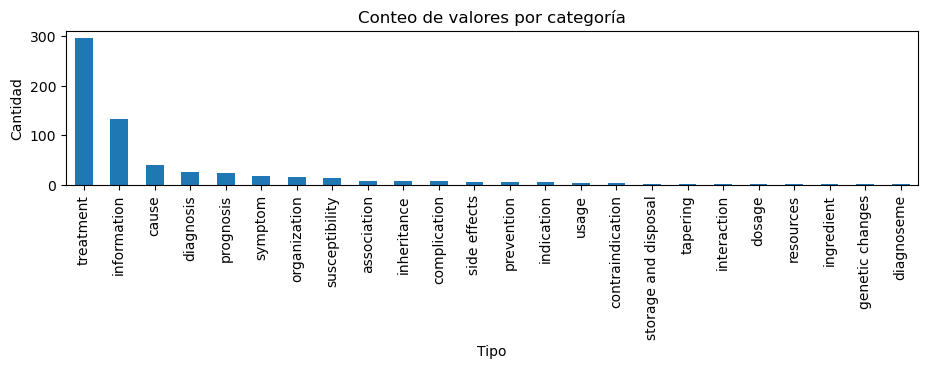

In [8]:
import matplotlib.pyplot as plt

conteo_por_tipo = df["type"].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(11, 2))
conteo_por_tipo.plot(kind="bar")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.title("Conteo de valores por categoría")
plt.show()

In [9]:
df

,Q_id,message,sub_Q_id,focus,type,A_id,answer
0,Q1,literature on cardiac amyloidosis please let m...,Q1-S1,cardiac amyloidosis,information,Q1-S1-A1,Cardiac amyloidosis is a disorder caused by de...
1,Q1,literature on cardiac amyloidosis please let m...,Q1-S1,cardiac amyloidosis,information,Q1-S1-A2,"The term ""amyloidosis"" refers not to a single ..."
2,Q2,migraine seems to be a spectrum of conditions ...,Q2-S1,migraine,treatment,Q2-S1-A1,There is no specific cure for migraine headach...
3,Q2,migraine seems to be a spectrum of conditions ...,Q2-S1,migraine,treatment,Q2-S1-A2,There is no absolute cure for migraine since i...
4,Q3,do i use pyridoxine tablets even if im pregnant,Q3-S1,pyridoxine,contraindication,Q3-S1-A1,"Before taking pyridoxine, tell your doc..."
...,...,...,...,...,...,...,...
627,316.0,if you should contact mrsa and take antibiotic...,NaN,mrsa,diagnosis,NaN,"Occasionally, a person who has been treated fo..."
628,317.0,what if you do not have surgery to remove a pa...,NaN,intraductal papilloma,prognosis,NaN,Your specialist will be able to advise you of ...
629,318.0,thank for your information on my earlier quest...,NaN,excessive tears,treatment,NaN,Your doctor may order tests to help determine ...
630,319.0,i have numbnesstingling in my lower right arm ...,NaN,numbnesstingling,treatment,NaN,Home Care Your doctor should find and treat t...


In [14]:
df = insert_type_cols(df)

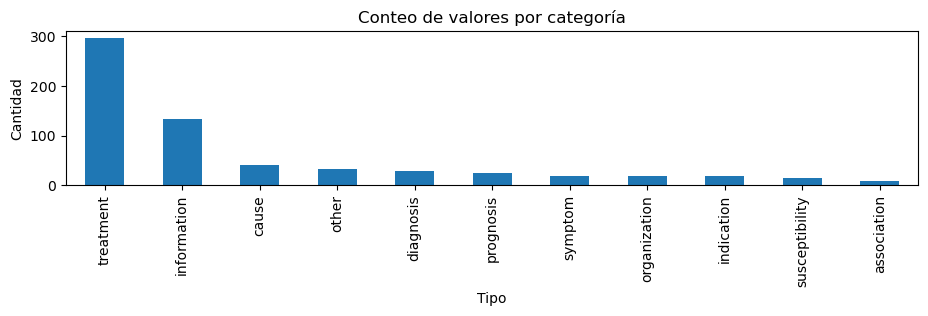

In [15]:
import matplotlib.pyplot as plt

conteo_por_tipo_especifico = df["type_especific"].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(11, 2))
conteo_por_tipo_especifico.plot(kind="bar")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.title("Conteo de valores por categoría")
plt.show()

In [18]:
conteo_por_tipo_especifico

type_especific
treatment         296
information       133
cause              40
other              32
diagnosis          28
prognosis          24
symptom            19
organization       19
indication         18
susceptibility     14
association         9
Name: count, dtype: int64

### Análsis de la similitud de los mensajes de distintos valores de la variable type

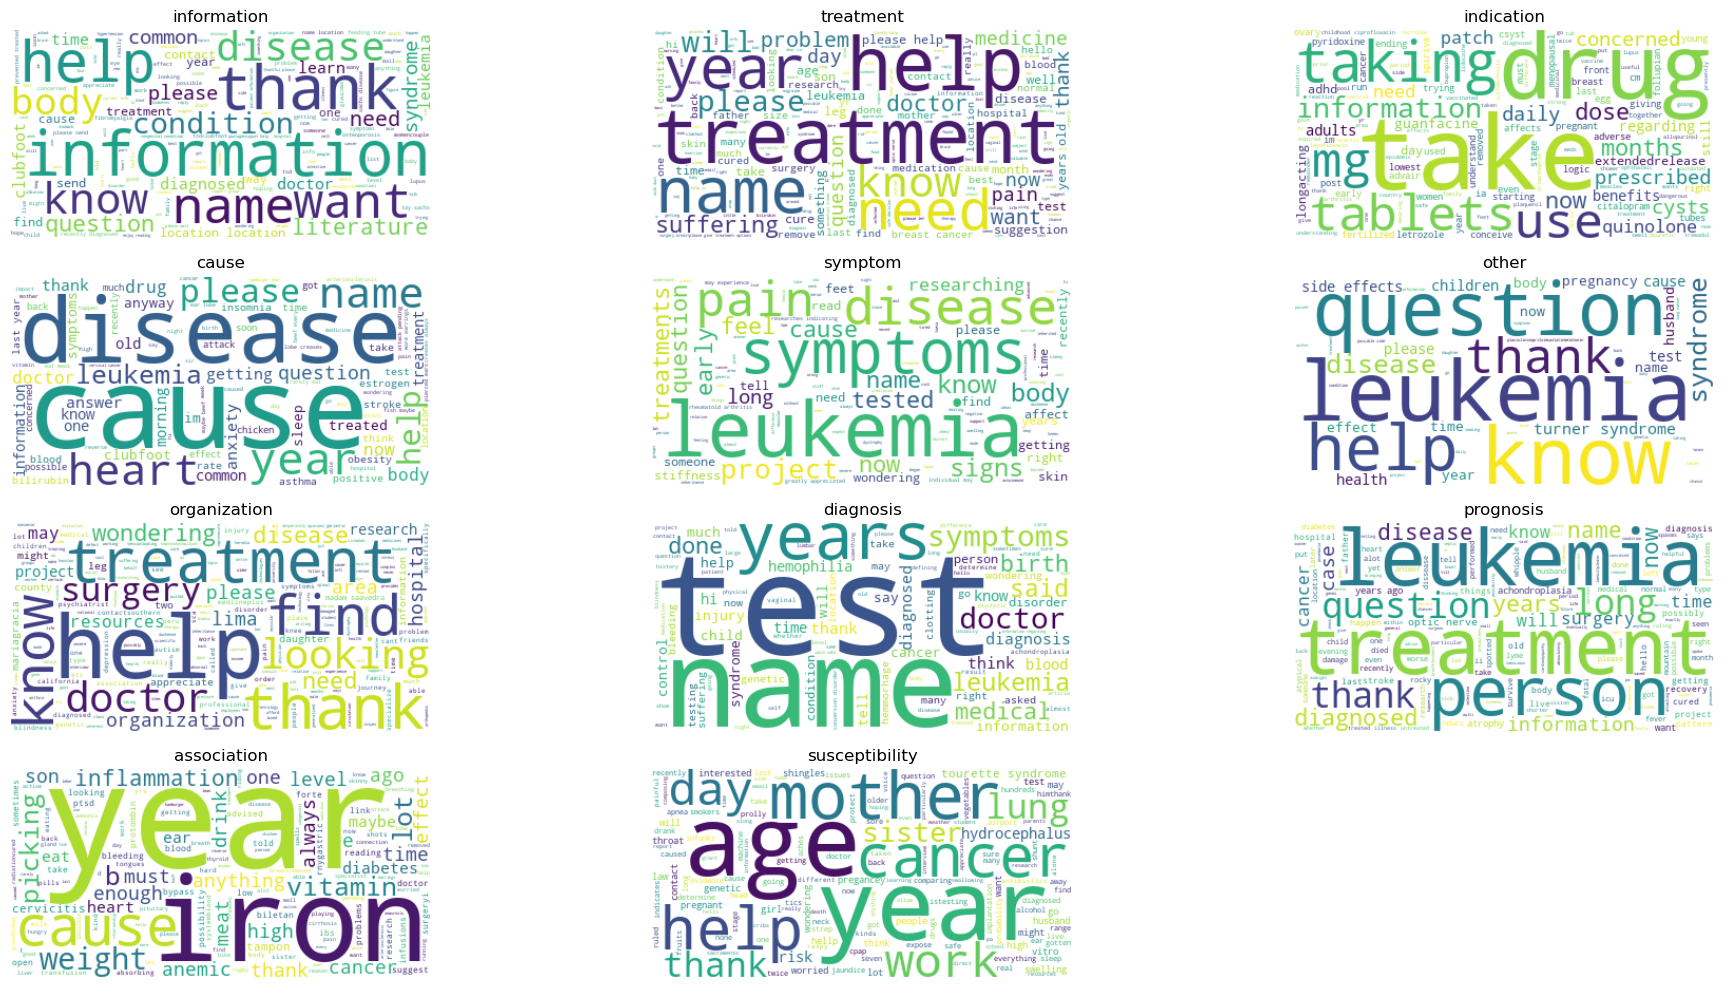

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear una función para generar el word cloud
def generate_wordcloud(data, category):
    text = " ".join(review for review in data[data['type_especific'] == category].message)
    wordcloud = WordCloud(background_color="white").generate(text)
    return wordcloud

# Obtener las categorías únicas
categories = df['type_especific'].unique()

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Generar y visualizar un word cloud para cada categoría
for i, category in enumerate(categories, 1):
    plt.subplot(4, (len(categories) + 1) // 4, i)
    wordcloud = generate_wordcloud(df, category)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(category)

plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch

# Cargar el modelo y el tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Función para obtener los embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

# Aplicar la función a cada mensaje
df['message_embeddings'] = df['message'].apply(get_bert_embeddings)

# Mostrar los embeddings
df.head()

,Q_id,message,sub_Q_id,focus,type,type_especific,type_general,A_id,answer,message_embeddings
0,Q1,literature on cardiac amyloidosis please let m...,Q1-S1,cardiac amyloidosis,information,information,information,Q1-S1-A1,Cardiac amyloidosis is a disorder caused by de...,"[-0.044393536, 0.0551569, 0.37757984, -0.13194..."
1,Q1,literature on cardiac amyloidosis please let m...,Q1-S1,cardiac amyloidosis,information,information,information,Q1-S1-A2,"The term ""amyloidosis"" refers not to a single ...","[-0.044393536, 0.0551569, 0.37757984, -0.13194..."
2,Q2,migraine seems to be a spectrum of conditions ...,Q2-S1,migraine,treatment,treatment,treatment,Q2-S1-A1,There is no specific cure for migraine headach...,"[-0.30367875, 0.12119411, 0.39071372, -0.25640..."
3,Q2,migraine seems to be a spectrum of conditions ...,Q2-S1,migraine,treatment,treatment,treatment,Q2-S1-A2,There is no absolute cure for migraine since i...,"[-0.30367875, 0.12119411, 0.39071372, -0.25640..."
4,Q3,do i use pyridoxine tablets even if im pregnant,Q3-S1,pyridoxine,contraindication,indication,other,Q3-S1-A1,"Before taking pyridoxine, tell your doc...","[-0.17022656, 0.27943316, 0.0760492, -0.210818..."


Agrupamos por tipos para analizar la similitud de sus distintos valores:

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

# Agrupar los embeddings por categoría y calcular el promedio
category_embeddings = df.groupby('type')['message_embeddings'].apply(np.mean)

# Convertir a una matriz para calcular la similitud
category_embeddings_matrix = np.stack(category_embeddings.values)

# Calcular la similitud coseno entre las categorías
similarity_matrix = cosine_similarity(category_embeddings_matrix)

# Crear un dataframe para visualizar la similitud
similarity_df = pd.DataFrame(similarity_matrix, index=category_embeddings.index, columns=category_embeddings.index)


In [52]:
# Encontrar la categoría más similar para cada categoría
most_similar_categories = similarity_df.apply(lambda row: row.nlargest(2).index[1], axis=1)

print(most_similar_categories)

type
association                        cause
cause                            symptom
complication                       cause
contraindication                   usage
diagnoseme                     treatment
diagnosis                          cause
dosage                      side effects
genetic changes                diagnosis
indication              contraindication
information                    treatment
ingredient                    indication
inheritance                    diagnosis
interaction                        usage
organization                 information
prevention                     diagnosis
prognosis                          cause
resources                   organization
side effects                  indication
storage and disposal               usage
susceptibility                     cause
symptom                            cause
tapering                       diagnosis
treatment                    information
usage                   contraindication
dtype: obje

Este análisis no me aporta conclusiones relevantes para los agrupamientos siendo alguna incluso contradictoria

### Preguntas con varios valores para la variable type

In [89]:
df_raw = pd.read_csv("data/data.csv", header=0)

In [87]:
# Primero, contamos el número de sub_question_id por cada question_id
counts = df_raw.groupby('Q_id')['sub_Q_id'].nunique()

# Luego, filtramos los question_id que tienen más de un sub_question_id
multiple_sub_questions = counts[counts > 3].index

# Finalmente, seleccionamos las filas correspondientes en el dataframe original
result = df_raw[df_raw['Q_id'].isin(multiple_sub_questions)]

result

,Q_id,message,sub_Q_id,focus,type,A_id,answer
96,Q63,I have a list of questions about Tay sachs dis...,Q63-S1,clubfoot,information,Q63-S1-A1,Clubfoot is when the foot turns inward and dow...
97,Q63,I have a list of questions about Tay sachs dis...,Q63-S1,clubfoot,information,Q63-S1-A2,Talipes equinovarus is a congenital (present f...
98,Q63,I have a list of questions about Tay sachs dis...,Q63-S2,clubfoot,cause,Q63-S2-A1,Clubfoot is the most common congenital disorde...
99,Q63,I have a list of questions about Tay sachs dis...,Q63-S3,clubfoot,treatment,Q63-S3-A1,Treatment may involve moving the foot into the...
100,Q63,I have a list of questions about Tay sachs dis...,Q63-S4,tsd,information,Q63-S4-A1,Tay-Sachs disease is a life-threatening diseas...
101,Q63,I have a list of questions about Tay sachs dis...,Q63-S4,tsd,information,Q63-S4-A2,"Summary Tay-Sachs disease is a rare, inh..."
102,Q63,I have a list of questions about Tay sachs dis...,Q63-S4,tsd,information,Q63-S4-A3,Tay-Sachs disease is a rare inherited disorder...
103,Q63,I have a list of questions about Tay sachs dis...,Q63-S4,tsd,information,Q63-S4-A4,Tay-Sachs disease is a rare inherited disorder...
104,Q63,I have a list of questions about Tay sachs dis...,Q63-S5,tsd,cause,Q63-S5-A1,Tay-Sachs disease occurs when the body lacks h...
105,Q63,I have a list of questions about Tay sachs dis...,Q63-S6,tsd,prevention,Q63-S6-A1,There is no known way to prevent this disorder...


La pregunta con el Q_id = Q63, constituye un claro ejemplo de la problemática con las subpreguntas

In [91]:
df_raw[df_raw["Q_id"] == "Q63"]

,Q_id,message,sub_Q_id,focus,type,A_id,answer
96,Q63,I have a list of questions about Tay sachs dis...,Q63-S1,clubfoot,information,Q63-S1-A1,Clubfoot is when the foot turns inward and dow...
97,Q63,I have a list of questions about Tay sachs dis...,Q63-S1,clubfoot,information,Q63-S1-A2,Talipes equinovarus is a congenital (present f...
98,Q63,I have a list of questions about Tay sachs dis...,Q63-S2,clubfoot,cause,Q63-S2-A1,Clubfoot is the most common congenital disorde...
99,Q63,I have a list of questions about Tay sachs dis...,Q63-S3,clubfoot,treatment,Q63-S3-A1,Treatment may involve moving the foot into the...
100,Q63,I have a list of questions about Tay sachs dis...,Q63-S4,tsd,information,Q63-S4-A1,Tay-Sachs disease is a life-threatening diseas...
101,Q63,I have a list of questions about Tay sachs dis...,Q63-S4,tsd,information,Q63-S4-A2,"Summary Tay-Sachs disease is a rare, inh..."
102,Q63,I have a list of questions about Tay sachs dis...,Q63-S4,tsd,information,Q63-S4-A3,Tay-Sachs disease is a rare inherited disorder...
103,Q63,I have a list of questions about Tay sachs dis...,Q63-S4,tsd,information,Q63-S4-A4,Tay-Sachs disease is a rare inherited disorder...
104,Q63,I have a list of questions about Tay sachs dis...,Q63-S5,tsd,cause,Q63-S5-A1,Tay-Sachs disease occurs when the body lacks h...
105,Q63,I have a list of questions about Tay sachs dis...,Q63-S6,tsd,prevention,Q63-S6-A1,There is no known way to prevent this disorder...


In [97]:
df_raw[df_raw["Q_id"] == "Q63"].iloc[0].message

'I have a list of questions about Tay sachs disease and clubfoot   1. what is TSD/Clubfoot, and how does it effect a baby  2. what causes both? can it be prevented, treated, or cured  3. How common is TSD? how common is Clubfoot  4. How can your &quot;agency&quot; help a women/couple who are concerned about this congenital condition, and is there a cost?  If you can answer these few questions I would be thankful, please get back as soon as you can.'

In [95]:
import re
re.findall(r'\d+(\D+)', df_raw[df_raw["Q_id"] == "Q63"].message.iloc[0])


['. what is TSD/Clubfoot, and how does it effect a baby  ',
 '. what causes both? can it be prevented, treated, or cured  ',
 '. How common is TSD? how common is Clubfoot  ',
 '. How can your &quot;agency&quot; help a women/couple who are concerned about this congenital condition, and is there a cost?  If you can answer these few questions I would be thankful, please get back as soon as you can.']

La misma pregunta no solo tiene asociados varios tipos si no también varios tipos. 
Otro ejemplo de la misma problemática es la de índice Q103:

In [93]:
df_raw[df_raw["Q_id"] == "Q103"]

,Q_id,message,sub_Q_id,focus,type,A_id,answer
192,Q103,Project. Hi my name is [NAME] and I'm doing a ...,Q103-S1,leukemia,cause,Q103-S1-A1,Some cases of chronic myelomonocytic leukemia ...
193,Q103,Project. Hi my name is [NAME] and I'm doing a ...,Q103-S2,leukemia,prognosis,Q103-S2-A1,People with acute myelogenous leukemia (AML) m...
194,Q103,Project. Hi my name is [NAME] and I'm doing a ...,Q103-S3,leukemia,information,Q102-S3-A1,Leukemia is a cancer of the blood cells. It is...
195,Q103,Project. Hi my name is [NAME] and I'm doing a ...,Q103-S4,leukemia,inheritance,Q102-S4-A1,Sometimes people inherit DNA mutations from a ...
196,Q103,Project. Hi my name is [NAME] and I'm doing a ...,Q103-S5,leukemia,diagnosis,Q102-S5-A1,"Diagnosing Leukemia: Physical Exam, Blood Test..."
197,Q103,Project. Hi my name is [NAME] and I'm doing a ...,Q103-S6,leukemia,treatment,Q103-S6-A1,There are many treatment options for people wi...
198,Q103,Project. Hi my name is [NAME] and I'm doing a ...,Q103-S6,leukemia,treatment,Q103-S6-A2,"Unlike other types of cancer, leukemia isn't a..."
199,Q103,Project. Hi my name is [NAME] and I'm doing a ...,Q103-S6,leukemia,treatment,Q103-S6-A3,"Treatment depends on a number of factors, incl..."
200,Q103,Project. Hi my name is [NAME] and I'm doing a ...,Q103-S6,leukemia,treatment,Q103-S6-A4,Standard treatments for leukemia include chemo...
201,Q103,Project. Hi my name is [NAME] and I'm doing a ...,Q103-S6,leukemia,treatment,Q103-S6-A5,"Researchers are studying various drugs, immuno..."


Esta pregunta contiene 7 subpreguntas con índice

In [79]:
df_raw[df_raw["Q_id"] == "Q103"].iloc[0].message

"Project. Hi my name is [NAME] and I'm doing a school project about leukemia and I was wondering if you can anwser some of my questions please.1. What cause leukemia cancer?2. Can you survive leukemia?3. How does leukemia affect your body?4. Is leukemia inherited?5. What is advanced leukemia?6. How long can someone with leukemia expect to live?7. Can you tell if you have leukemia?8. What treatments do you need to take?9. What are the signs of leukemia?10. What is the difference between AML and CML ? "

Sin embargo, viendo el mensaje parece haber 9, esto puede ser problemático a la hora de separar las subpreguntas para aquellas preguntas que contengan varias:

In [83]:
import re
re.findall(r'\d+(\D+)', df_raw[df_raw["Q_id"] == "Q103"].message.iloc[0])


['. What cause leukemia cancer?',
 '. Can you survive leukemia?',
 '. How does leukemia affect your body?',
 '. Is leukemia inherited?',
 '. What is advanced leukemia?',
 '. How long can someone with leukemia expect to live?',
 '. Can you tell if you have leukemia?',
 '. What treatments do you need to take?',
 '. What are the signs of leukemia?',
 '. What is the difference between AML and CML ? ']